In [10]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output.csv")

In [3]:
df.head()

,name,popularity,release_date,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Fortnight (feat. Post Malone),82,2024-04-19,1,0.504,0.386,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,228965,4
1,The Tortured Poets Department,79,2024-04-19,2,0.604,0.428,0,-8.441,1,0.0255,0.0483,0.000000,0.1260,0.292,110.259,293048,4
2,My Boy Only Breaks His Favorite Toys,80,2024-04-19,3,0.596,0.563,0,-7.362,1,0.0269,0.1370,0.000000,0.3020,0.481,97.073,203801,4
3,Down Bad,82,2024-04-19,4,0.541,0.366,11,-10.412,1,0.0748,0.5600,0.000001,0.0946,0.168,159.707,261228,4
4,"So Long, London",80,2024-04-19,5,0.423,0.533,9,-11.388,1,0.3220,0.7300,0.002640,0.0816,0.248,160.218,262975,4


In [4]:
df.describe()

,popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,57.537262,11.369151,0.581049,0.564908,4.502600,-7.673345,0.916811,0.056665,0.336379,0.003405,0.160974,0.389662,122.495797,239971.109185,3.961872
std,15.607793,8.050445,0.114686,0.191271,3.257003,2.917727,0.276407,0.071119,0.326890,0.027940,0.136786,0.194551,30.335224,45990.449693,0.331142
min,25.000000,1.000000,0.175000,0.118000,0.000000,-17.932000,0.000000,0.023100,0.000182,0.000000,0.035700,0.038400,68.097000,83253.000000,1.000000
25%,45.000000,5.000000,0.515000,0.417000,2.000000,-9.403000,1.000000,0.030300,0.039600,0.000000,0.096600,0.230000,96.888000,211853.000000,4.000000
50%,61.000000,10.000000,0.595000,0.569000,5.000000,-7.357000,1.000000,0.037700,0.187000,0.000002,0.114000,0.374000,119.054000,235400.000000,4.000000
75%,69.000000,15.000000,0.653000,0.719000,7.000000,-5.572000,1.000000,0.054900,0.661000,0.000048,0.161000,0.521000,143.942000,260440.000000,4.000000
max,92.000000,46.000000,0.897000,0.950000,11.000000,-1.927000,1.000000,0.912000,0.971000,0.333000,0.931000,0.943000,208.918000,613027.000000,5.000000


C:\Users\khurs\AppData\Local\Temp\ipykernel_23288\4220177622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


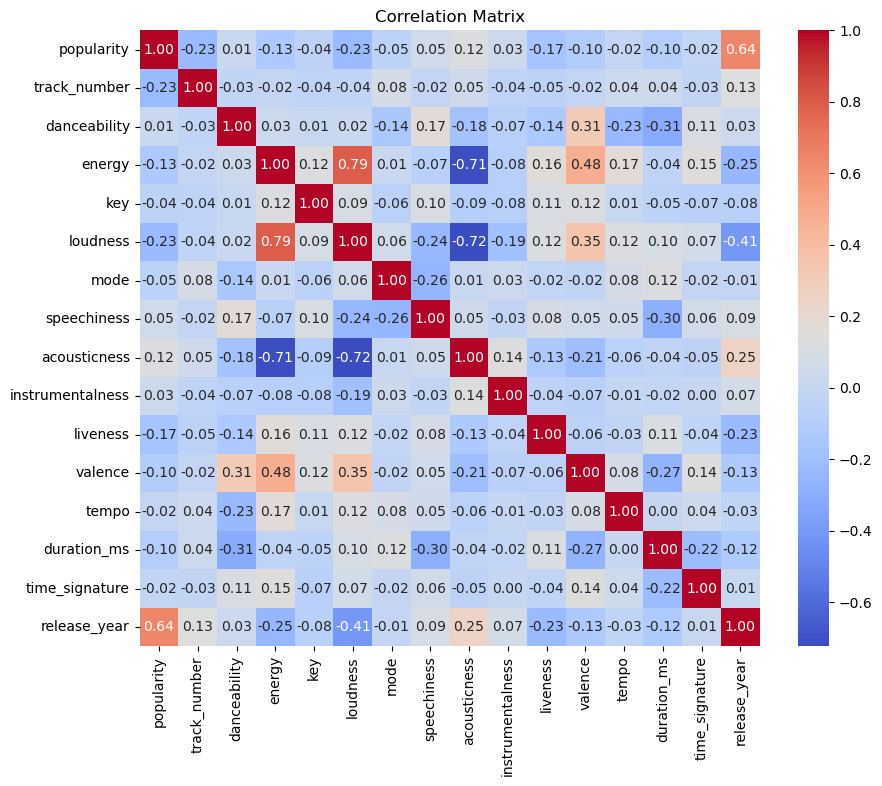

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()  

C:\Users\khurs\AppData\Local\Temp\ipykernel_23288\1659807821.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = df.groupby('release_year').mean()  # Assuming you want to analyze the average values per year


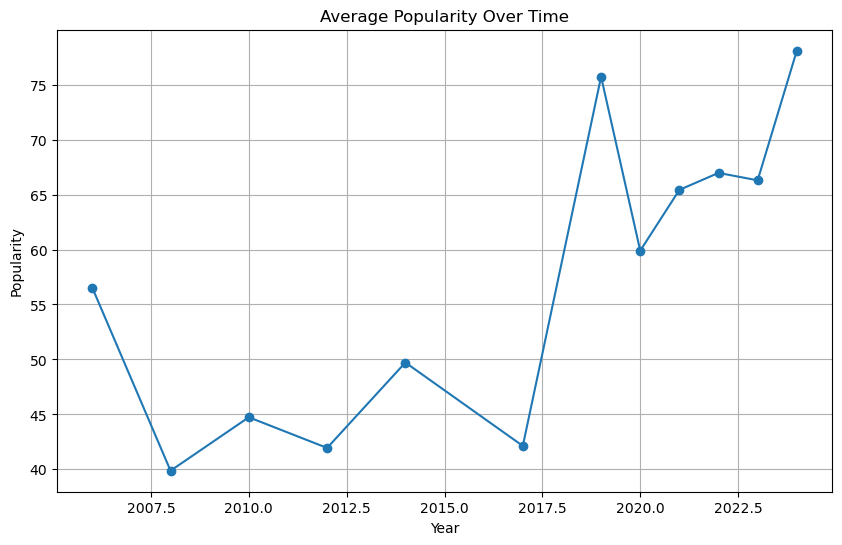

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Aggregate data by year
df['release_year'] = df['release_date'].dt.year
yearly_data = df.groupby('release_year').mean()  # Assuming you want to analyze the average values per year

# Plot trends over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['popularity'], marker='o', linestyle='-')
plt.title('Average Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

C:\Users\khurs\AppData\Local\Temp\ipykernel_23288\1860201582.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = df.groupby('release_month').mean()


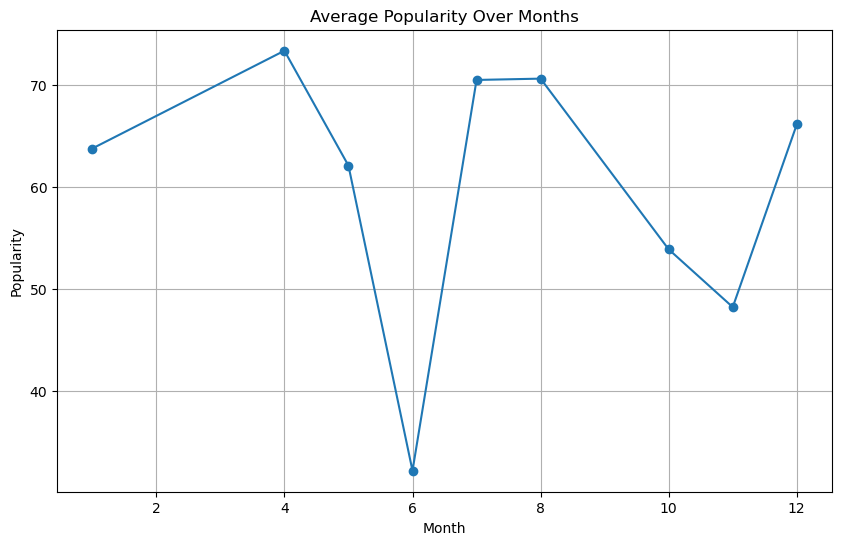

In [13]:
df['release_month'] = df['release_date'].dt.month
monthly_data = df.groupby('release_month').mean()

# Plot trends over months
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['popularity'], marker='o', linestyle='-')
plt.title('Average Popularity Over Months')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

C:\Users\khurs\AppData\Local\Temp\ipykernel_23288\2611465225.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_data = df.groupby('release_quarter').mean()


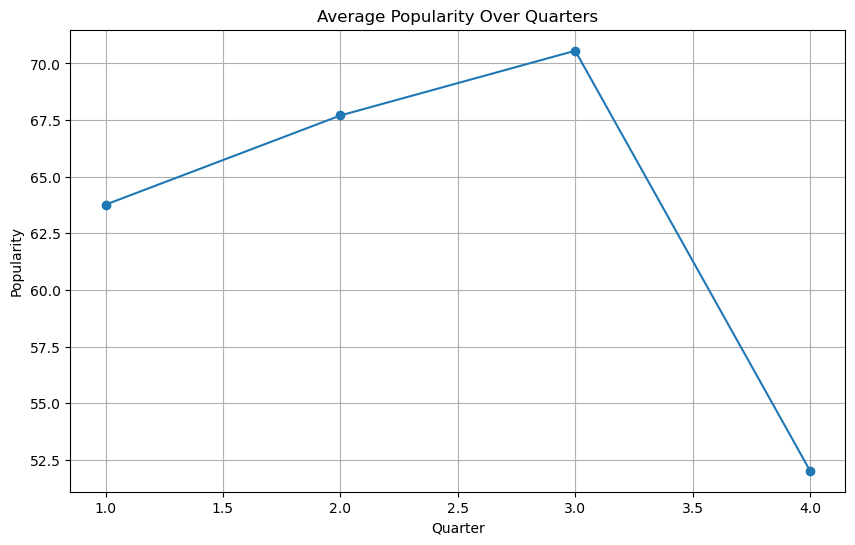

In [14]:
df['release_quarter'] = df['release_date'].dt.quarter
quarterly_data = df.groupby('release_quarter').mean()
plt.figure(figsize=(10, 6))
plt.plot(quarterly_data.index, quarterly_data['popularity'], marker='o', linestyle='-')
plt.title('Average Popularity Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

C:\Users\khurs\AppData\Local\Temp\ipykernel_23288\4239530083.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dayofweek_data = df.groupby('release_dayofweek').mean()


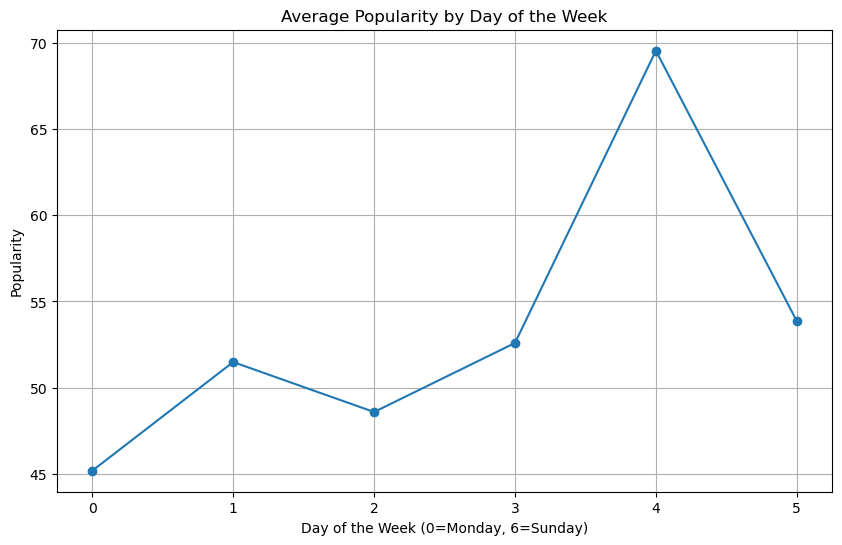

In [15]:
df['release_dayofweek'] = df['release_date'].dt.dayofweek
dayofweek_data = df.groupby('release_dayofweek').mean()
plt.figure(figsize=(10, 6))
plt.plot(dayofweek_data.index, dayofweek_data['popularity'], marker='o', linestyle='-')
plt.title('Average Popularity by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [17]:
if 'Artist' in df.columns:
    df = pd.get_dummies(df, columns=['Artist'], drop_first=True)
    columns_to_drop = ['mode', 'time_signature', 'release_year']
    df = df.drop(columns=columns_to_drop)
else:
    print("Column 'Artist' not found in the DataFrame")

Column 'Artist' not found in the DataFrame


In [18]:
# Example with different column name
if ' Artist ' in df.columns:
    df = pd.get_dummies(df, columns=[' Artist '], drop_first=True)
    columns_to_drop = ['mode', 'time_signature', 'release_year']
    df = df.drop(columns=columns_to_drop)
else:
    print("Column ' Artist ' not found in the DataFrame")


Column ' Artist ' not found in the DataFrame


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['popularity'])  
y = df['popularity']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (461, 20)
X_test shape: (116, 20)
y_train shape: (461,)
y_test shape: (116,)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Larger example DataFrame
data = {
    'Song': [
        "Bad Blood (feat. Kendrick Lamar) (Taylor's Version)", "Shake It Off", "Blank Space",
        "Love Story (Taylor's Version)", "You Belong With Me", "Style",
        "We Are Never Ever Getting Back Together", "I Knew You Were Trouble",
        "Red (Taylor's Version)", "Wildest Dreams (Taylor's Version)"
    ],
    'Artist': [
        "Taylor Swift", "Taylor Swift", "Taylor Swift", "Taylor Swift", "Taylor Swift",
        "Taylor Swift", "Taylor Swift", "Taylor Swift", "Taylor Swift", "Taylor Swift"
    ],
    'Danceability': [0.5, 0.7, 0.8, 0.6, 0.9, 0.5, 0.8, 0.6, 0.7, 0.8],
    'Energy': [0.8, 0.6, 0.9, 0.7, 0.8, 0.6, 0.9, 0.7, 0.8, 0.9]
}
df = pd.DataFrame(data)

# Encoding categorical variable
df = pd.get_dummies(df, columns=['Song', 'Artist'], drop_first=True)

# Define feature matrix X and target variable y
X = df.drop(columns=['Danceability'])  # Example feature columns
y = df['Danceability']  # Example target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM) Regression": SVR()
}

# Train, predict, and evaluate models
for name, model in models.items():
    print("Training", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print()

Training Linear Regression
Results for Linear Regression:
Mean Absolute Error (MAE): 0.14222222222222217
Mean Squared Error (MSE): 0.028562962962962946
R-squared (R2): -2.2133333333333325

Training Decision Tree Regression
Results for Decision Tree Regression:
Mean Absolute Error (MAE): 0.1333333333333333
Mean Squared Error (MSE): 0.01999999999999999
R-squared (R2): -1.2499999999999996

Training Random Forest Regression
Results for Random Forest Regression:
Mean Absolute Error (MAE): 0.10033333333333339
Mean Squared Error (MSE): 0.010197666666666667
R-squared (R2): -0.14723750000000035

Training Support Vector Machine (SVM) Regression
Results for Support Vector Machine (SVM) Regression:
Mean Absolute Error (MAE): 0.07496076705046517
Mean Squared Error (MSE): 0.010774194603836489
R-squared (R2): -0.21209689293160539

